In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import numpy as np

conn = pymysql.connect(
    host='localhost',
    user='root',
    password='123456',
    database='ecommerce'
)
cursor = conn.cursor()

# List all unique cities where customers are located.

In [38]:
query = """ SELECT DISTINCT customer_city FROM customers """
cursor.execute(query)
data = cursor.fetchall()

data

(('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [32]:
query = """ SELECT COUNT(order_id) FROM orders WHERE year(order_purchase_timestamp) = 2017 """
cursor.execute(query)
data = cursor.fetchall()
"Total order placed in 2017 are: ", data[0][0]

('Total order placed in 2017 are: ', 45101)

# Find the total sales per category.

In [17]:
query = """ SELECT UPPER(p.product_category) category, ROUND(SUM(pay.payment_value), 2) sales FROM products p JOIN order_items o ON p.product_id = o.product_id JOIN payments pay
ON pay.order_id = o.order_id GROUP BY category """
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [28]:
query = """ SELECT (SUM(CASE WHEN payment_installments >= 1 THEN 1
ELSE 0 END))/COUNT(*)*100 FROM payments """
cursor.execute(query)
data = cursor.fetchall()
data

((Decimal('99.9981'),),)

# Count the number of customers from each state.

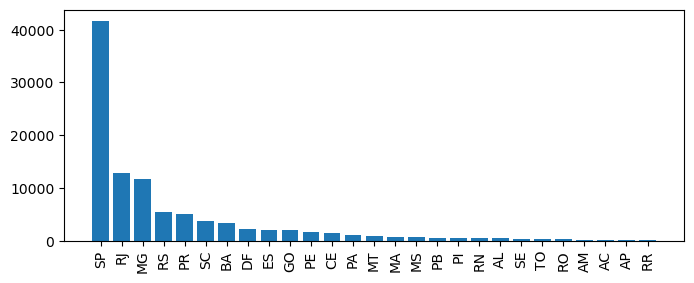

In [45]:
query = """ SELECT customer_state, COUNT(customer_id) AS 'No of customer from each state' FROM customers GROUP BY customer_state  """
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=["State", "No. of Customer"])
df = df.sort_values(by="No. of Customer", ascending=False)
# df
plt.figure(figsize=(8, 3))
plt.bar(df["State"], df["No. of Customer"])
plt.xticks(rotation = 90)
plt.show()

# -------   Intermediate Level---------

# Calculate the number of orders per month in 2018.

In [62]:
query = """ SELECT monthname(order_purchase_timestamp) months, COUNT(order_id) order_count FROM orders WHERE year(order_purchase_timestamp) = 2018 GROUP BY months  """
cursor.execute(query)
data = cursor.fetchall()
data

(('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4))

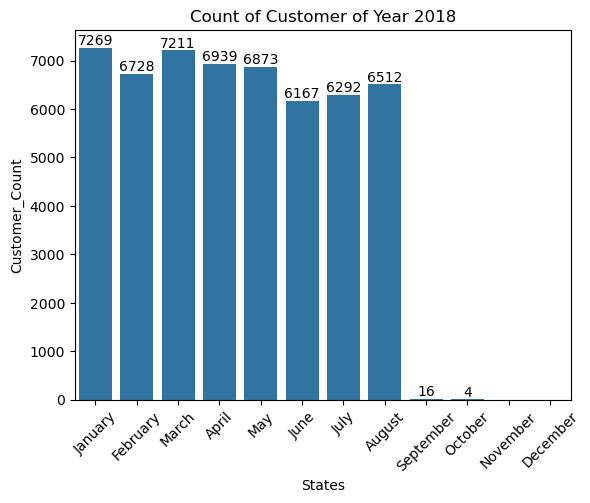

In [90]:
df = pd.DataFrame(data, columns=["Month", "Order_Count"])
df
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x=df['Month'], y=df['Order_Count'], order=o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.xlabel("States")
plt.ylabel("Customer_Count")
plt.title("Count of Customer of Year 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [114]:
query = """ WITH count_per_order as (SELECT orders.order_id, orders.customer_id, count(order_items.order_id) as oc FROM orders JOIN order_items ON orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id)
select customers.customer_city, ROUND(AVG(count_per_order.oc), 2) avg_orders FROM customers join count_per_order on customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city order by avg_orders """
cursor.execute(query)
data = cursor.fetchall()
data
df = pd.DataFrame(data, columns=["City", "Avg_Orders"])
df

,City,Avg_Orders
0,sonora,1.00
1,porteiras,1.00
2,itabi,1.00
3,silvanopolis,1.00
4,salmourao,1.00
...,...,...
4105,matias olimpio,5.00
4106,datas,6.00
4107,candido godoi,6.00
4108,celso ramos,6.50


# Calculate the percentage of total revenue contributed by each product category.

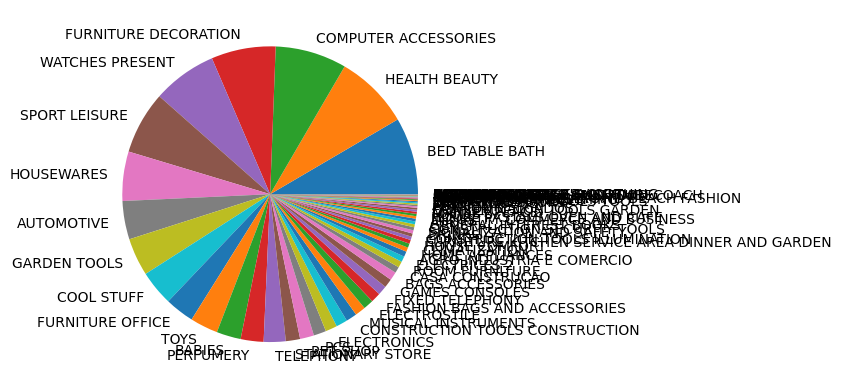

In [128]:
query = """ SELECT UPPER(p.product_category) category, ROUND((SUM(pay.payment_value)/(SELECT SUM(payment_value) FROM payments))*100, 2) sales FROM products p JOIN order_items o ON p.product_id = o.product_id JOIN payments pay
ON pay.order_id = o.order_id GROUP BY category ORDER BY sales DESC; """
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=["Category", "Sales_Percentage"])
# df
plt.pie(df["Sales_Percentage"], labels=df["Category"])
plt.show()

# Identify the correlation between product price and the number of times a product has been purchased.

In [141]:
query = """ SELECT p.product_category, COUNT(o.product_id) number_of_products, ROUND(AVG(o.price)) price
FROM products p JOIN order_items o ON p.product_id = o.product_id GROUP BY p.product_category; """
cursor.execute(query)
data = cursor.fetchall()
data
df = pd.DataFrame(data, columns=["Category", "Number_of_products", "Prices"])
df
# For finding Correlation
arr1 = df["Number_of_products"]
arr2 = df["Prices"]
a = np.corrcoef([arr1, arr2])
print("the correlation between prices and number of times a product as been purchased is: ", a[0][1])

the correlation between prices and number of times a product as been purchased is:  -0.10643950249375136


# Calculate the total revenue generated by each seller, and rank them by revenue.

In [12]:
query = """ SELECT *, dense_rank() over(order by revenue desc) as rn FROM (SELECT o.seller_id, SUM(p.payment_value) revenue FROM order_items o JOIN payments p ON o.order_id = p.order_id GROUP BY o.seller_id) as a """
cursor.execute(query)
data = cursor.fetchall()
data

(('7c67e1448b00f6e969d365cea6b010ab', 507166.9073021412, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.0398402214, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.26976528764, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42012761533, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.0804977417, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.31931465864, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.1209387779, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.30050226487, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.22986984253, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.20970630646, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.74904833734, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.80002561212, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.7397725582, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91018915176, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.3400707245, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04013061523, 16),
 ('620c

In [14]:
df = pd.DataFrame(data, columns=["Seller_id", "Revenue", "Rank"])
df

,Seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


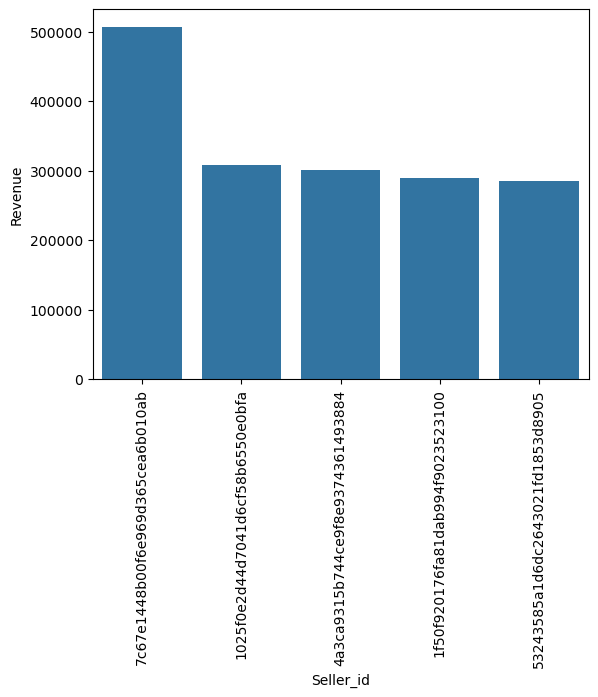

In [20]:
sns.barplot(x="Seller_id", y="Revenue", data=df.head())
plt.xticks(rotation=90)
plt.show()

# --------------- Advanced Queries---------------------------------- 

# Calculate the moving average of order values for each customer over their order history.

In [25]:
query = """SELECT customer_id, order_purchase_timestamp, payment, AVG(payment) OVER(partition by customer_id ORDER BY order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from (SELECT o.customer_id, o.order_purchase_timestamp, p.payment_value as payment FROM payments p JOIN orders o ON p.order_id = o.order_id) as a"""
cursor.execute(query)
data = cursor.fetchall()
data

(('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35,
  179.35000610351562),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01,
  107.01000213623047),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:12',
  71.8,
  71.80000305175781),
 ('000419c5494106c306a97b5635748086',
  '2018-03-02 17:47:40',
  49.4,
  49.400001525878906),
 ('00046a560d407e99b969756e0b10f282',
  '2017-12-18 11:08:30',
  166.59,
  166.58999633789062),
 ('00050bf6e01e69d5c0fd612f1bcfb69c',
  '2017-09-17 16:04:44',
  85.23,
  85.2300033569336),
 ('000598caf2ef4117407665ac33275130',
  '2018-08-11 12:14:35',
  1255.71,
  1255.7099609375),
 ('0005aefbb696d34b3424dccd0a0e9fd0',
  '2018-06-20 0

In [29]:
df = pd.DataFrame(data, columns=["customer_id", "order_date", "payment", "mov_avg"])
df

,customer_id,order_date,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year

In [32]:
query = """ select years, months, payment, round(sum(payment) over(order by years, months),2) cumlative_sales from 
(SELECT year(o.order_purchase_timestamp) as years, month(o.order_purchase_timestamp) as months, ROUND(SUM(p.payment_value), 2) as payment from orders o join payments p
on o.order_id = p.order_id group by years, months order by years, months) as a; """
cursor.execute(query)
data = cursor.fetchall()
data

((2016, 9, 252.24, 252.24),
 (2016, 10, 59090.48, 59342.72),
 (2016, 12, 19.62, 59362.34),
 (2017, 1, 138488.04, 197850.38),
 (2017, 2, 291908.01, 489758.39),
 (2017, 3, 449863.6, 939621.99),
 (2017, 4, 417788.03, 1357410.02),
 (2017, 5, 592918.82, 1950328.84),
 (2017, 6, 511276.38, 2461605.22),
 (2017, 7, 592382.92, 3053988.14),
 (2017, 8, 674396.32, 3728384.46),
 (2017, 9, 727762.45, 4456146.91),
 (2017, 10, 779677.88, 5235824.79),
 (2017, 11, 1194882.8, 6430707.59),
 (2017, 12, 878401.48, 7309109.07),
 (2018, 1, 1115004.18, 8424113.25),
 (2018, 2, 992463.34, 9416576.59),
 (2018, 3, 1159652.12, 10576228.71),
 (2018, 4, 1160785.48, 11737014.19),
 (2018, 5, 1153982.15, 12890996.34),
 (2018, 6, 1023880.5, 13914876.84),
 (2018, 7, 1066540.75, 14981417.59),
 (2018, 8, 1022425.32, 16003842.91),
 (2018, 9, 4439.54, 16008282.45),
 (2018, 10, 589.67, 16008872.12))

In [34]:
df = pd.DataFrame(data, columns=["years", "months", "payments", "cumlative_sales"])
df

,years,months,payments,cumlative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [49]:
query = """ with a as(SELECT year(o.order_purchase_timestamp) as years, ROUND(SUM(p.payment_value), 2) as payment from orders o join payments p
on o.order_id = p.order_id group by years order by years) 
select years, ((payment - lag(payment, 1) over(order by years)) / lag(payment, 1) over(order by years)) * 100 rate from a """
cursor.execute(query)
data = cursor.fetchall()
data

((2016, None), (2017, 12112.703761340945), (2018, 20.00092381158259))

In [50]:
df = pd.DataFrame(data, columns=["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [56]:
query = """ with a as(SELECT c.customer_id, min(o.order_purchase_timestamp) first_order from customers c join orders o on c.customer_id=o.customer_id group by c.customer_id),
b as (select a.customer_id, count(distinct o.order_purchase_timestamp) next_order from a join orders o on o.customer_id=a.customer_id and o.order_purchase_timestamp > a.first_order
and o.order_purchase_timestamp < date_add(first_order, interval 6 month) group by a.customer_id)
select 100 * (count(distinct a.customer_id)/count(distinct b.customer_id)) from a left join b on a.customer_id = b.customer_id; """
cursor.execute(query)
data = cursor.fetchall()
data

((None,),)

# Identify the top 3 customers who spent the most money in each year.

In [59]:
query = """select years, customer_id, payment, rn from 
(select year(o.order_purchase_timestamp) years, o.customer_id, sum(p.payment_value) payment ,dense_rank() over (partition by year(o.order_purchase_timestamp) 
order by sum(p.payment_value) desc) rn 
from orders o join payments p on p.order_id=o.order_id group by year(o.order_purchase_timestamp), o.customer_id) as a where rn<=3;"""
cursor.execute(query)
data = cursor.fetchall()
data

((2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.080078125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31005859375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66015625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.8798828125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.2099609375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.43994140625, 3))

In [61]:
df = pd.DataFrame(data, columns=["years", "customer_id", "payment", "rank"])
df

,years,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


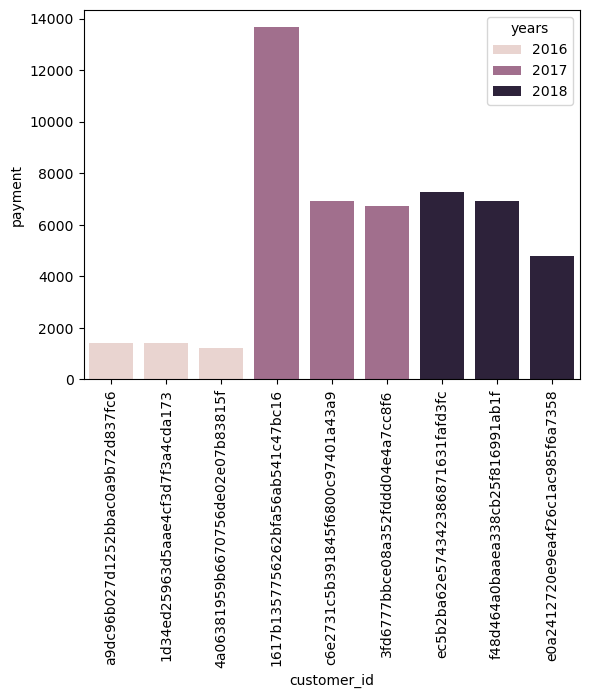

In [71]:
sns.barplot(x="customer_id", y="payment", data=df, hue="years")
plt.xticks(rotation=90)
plt.show()